In [5]:
import nltk
import ssl
if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
print(stopwords.words("english")[:10])
from nltk.sentiment.vader import SentimentIntensityAnalyzer
s = SentimentIntensityAnalyzer() # en inglés hasta podemos distinguir entre palabras positivas y negativas
print(s.polarity_scores('useless'))
print(s.polarity_scores('marvelous'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alex_\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alex_\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\alex_\AppData\Roaming\nltk_data...


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4215}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5994}


In [15]:

import pandas as pd
d = pd.read_csv("https://raw.githubusercontent.com/mayraberrones94/Ciencia_de_Datos/master/rev-solo.csv")
d.head(5)

,Aromas include tropical fruit broom brimstone and dried herb. The palate isn't overly expressive offering unripened apple citrus and dried sage alongside brisk acidity.,Italy,White Blend
0,This is ripe and fruity a wine that is smooth ...,Portugal,Portuguese Red
1,Tart and snappy the flavors of lime flesh and ...,US,Pinot Gris
2,Pineapple rind lemon pith and orange blossom s...,US,Riesling
3,Much like the regular bottling from 2012 this ...,US,Pinot Noir
4,Blackberry and raspberry aromas show a typical...,Spain,Tempranillo-Merlot


In [16]:
d

,Aromas include tropical fruit broom brimstone and dried herb. The palate isn't overly expressive offering unripened apple citrus and dried sage alongside brisk acidity.,Italy,White Blend
0,This is ripe and fruity a wine that is smooth ...,Portugal,Portuguese Red
1,Tart and snappy the flavors of lime flesh and ...,US,Pinot Gris
2,Pineapple rind lemon pith and orange blossom s...,US,Riesling
3,Much like the regular bottling from 2012 this ...,US,Pinot Noir
4,Blackberry and raspberry aromas show a typical...,Spain,Tempranillo-Merlot
...,...,...,...
129967,Notes of honeysuckle and cantaloupe sweeten th...,Germany,Riesling
129968,Citation is given as much as a decade of bottl...,US,Pinot Noir
129969,Well-drained gravel soil gives this wine its c...,France,Gewürztraminer
129970,A dry style of Pinot Gris this is crisp with s...,France,Pinot Gris


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

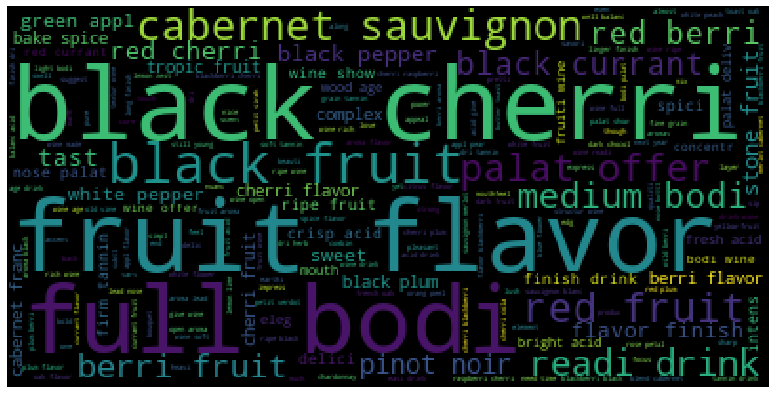

In [19]:
d.columns = ['description', 'country', 'variety']
n = len(d)
spa = stopwords.words("english")
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'\w+') # para eliminar puntuación
reemplazos = []
for r in range(n):
    original = d.description[r]
    reemplazo = ''
    if original != 'NaN':
        quedar = [stemmer.stem(p) for p in tokenizer.tokenize(original) if p.lower() not in spa]
        reemplazo = ' '.join(quedar)
    reemplazos.append(reemplazo)
d['limpios'] = reemplazos
texto = ' '.join(reemplazos)
nube = WordCloud().generate(texto)
plt.rcParams["figure.figsize"] = [15, 7]
plt.imshow(nube)
plt.axis("off")
plt.show()

Respecto a nuestra caracteristica podriamos traducirlo como tipo de vino aquí podemos ver el tipo de vinos que existen

In [25]:
header = ['description','country',  'variety']
writer = d[d['country'] == 'Mexico']
writer.to_csv('Mexico-wine.csv', columns = header, index=False)

d2 = pd.read_csv('Mexico-wine.csv')
d2.head(15)

,description,country,variety
0,The color is appropriately light the aromas ap...,Mexico,Nebbiolo
1,Sauvignon Blanc is in general one of Baja's mo...,Mexico,Sauvignon Blanc
2,Aromas of mature Cabernet: cassis tobacco leaf...,Mexico,Cabernet Sauvignon
3,While this is fiery on the nose you also get a...,Mexico,Nebbiolo
4,Dark and earthy slightly pruny and alcoholic f...,Mexico,Petite Sirah
5,Oxidized cherry and strawberry aromas settle o...,Mexico,Rosé
6,With aromas of salsa chili peppers and tomato ...,Mexico,Cabernet Franc
7,Mild hints of tropical fruit are less than con...,Mexico,Sauvignon Blanc
8,This odd blend of Barbera Cabernet Sauvignon P...,Mexico,Red Blend
9,This Cabernet blend is one of Baja's best reds...,Mexico,Red Blend


Aquí solo se guardan los vinos de Mexico en mi head puse que me mostrara los primeros 15 y en la parte posterior tenemos la descripcion, pais y la variedad de vinos que existen.

In [27]:
header = ['description','country',  'variety']
writer = d[d['country'] == 'Germany']
writer.to_csv('Alemania-wine.csv', columns = header, index=False)

d4 = pd.read_csv('Alemania-wine.csv')
d4.head(20)

,description,country,variety
0,Savory dried thyme notes accent sunnier flavor...,Germany,Gewürztraminer
1,Zesty orange peels and apple notes abound in t...,Germany,Riesling
2,Earthy pollen and mineral notes lend a savory ...,Germany,Riesling
3,Pronounced dust pollen and earth tones lend sa...,Germany,Riesling
4,Crisp pristine peach and apricot notes resonat...,Germany,Riesling
5,Approachably fruity yet nuanced and electrifyi...,Germany,Riesling
6,Fresh and fragrant of blossoms tart yellow pea...,Germany,Riesling
7,Just a touch of honey-lemon sweetness is enoug...,Germany,Riesling
8,Dusty saffron-spiced earthiness is juxtaposed ...,Germany,Riesling
9,Whiffs of white mushroom saffron and caramel l...,Germany,Riesling


In [28]:
header = ['description','country',  'variety']
writer = d[d['country'] == 'US']
writer.to_csv('US-wine.csv', columns = header, index=False)

d4 = pd.read_csv('US-wine.csv')
d4.head(30)

,description,country,variety
0,Tart and snappy the flavors of lime flesh and ...,US,Pinot Gris
1,Pineapple rind lemon pith and orange blossom s...,US,Riesling
2,Much like the regular bottling from 2012 this ...,US,Pinot Noir
3,Soft supple plum envelopes an oaky structure i...,US,Cabernet Sauvignon
4,Slightly reduced this wine offers a chalky tan...,US,Cabernet Sauvignon
5,Building on 150 years and six generations of w...,US,Chardonnay
6,Red fruit aromas pervade on the nose with ciga...,US,Meritage
7,Ripe aromas of dark berries mingle with ample ...,US,Red Blend
8,A sleek mix of tart berry stem and herb along ...,US,Pinot Noir
9,This wine from the Geneseo district offers aro...,US,Merlot
